import libraies

In [1]:
import pandas as pd
import numpy as np

import file

In [2]:
df = pd.read_csv("/content/Salary Data.csv")

In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


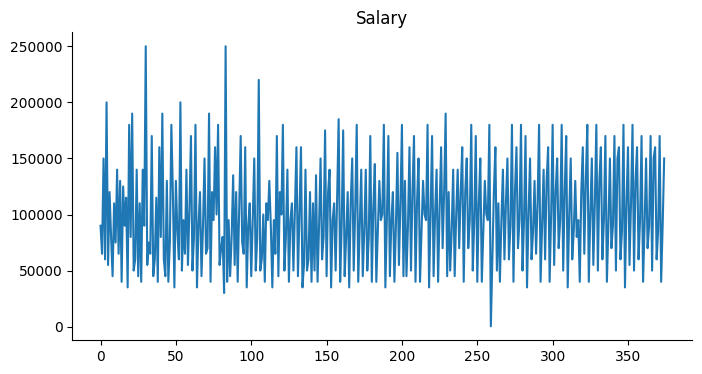

In [31]:
# @title Salary

from matplotlib import pyplot as plt
df['Salary'].plot(kind='line', figsize=(8, 4), title='Salary')
plt.gca().spines[['top', 'right']].set_visible(False)

remove missing rows

In [4]:
df = df.dropna()

In [5]:
from sklearn.impute import SimpleImputer


One-hot encode

In [6]:
df = pd.get_dummies(df, drop_first=True)

indepened ,depended variable

In [7]:
x = df[['Years of Experience']]
y = df[['Salary']]

In [8]:
print(x)

     Years of Experience
0                    5.0
1                    3.0
2                   15.0
3                    7.0
4                   20.0
..                   ...
370                  8.0
371                 19.0
372                  2.0
373                  7.0
374                 15.0

[373 rows x 1 columns]


In [9]:
print(y)

       Salary
0     90000.0
1     65000.0
2    150000.0
3     60000.0
4    200000.0
..        ...
370   85000.0
371  170000.0
372   40000.0
373   90000.0
374  150000.0

[373 rows x 1 columns]


import train test split

In [10]:
from sklearn.model_selection import train_test_split

split the train and test data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


import standard scalar

In [12]:
from sklearn.preprocessing import StandardScaler

Initialize the StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import KNeighborsRegressor

In [15]:
from sklearn.neighbors import KNeighborsRegressor

train

In [16]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

prediction

In [17]:
y_pred = knn.predict(X_test_scaled)

result

In [18]:
print(y_pred)

[[176000.]
 [ 94000.]
 [152000.]
 [ 83000.]
 [145000.]
 [154000.]
 [170000.]
 [ 94000.]
 [ 51000.]
 [100000.]
 [118000.]
 [176000.]
 [ 40000.]
 [100000.]
 [132000.]
 [ 51000.]
 [ 67000.]
 [ 38000.]
 [ 88000.]
 [ 87000.]
 [ 94000.]
 [100000.]
 [152000.]
 [ 67000.]
 [ 83000.]
 [ 61000.]
 [154000.]
 [ 40000.]
 [118000.]
 [150000.]
 [ 51000.]
 [132000.]
 [ 51000.]
 [144000.]
 [ 94000.]
 [ 39000.]
 [176000.]
 [ 40000.]
 [154000.]
 [ 61000.]
 [ 40000.]
 [100000.]
 [193000.]
 [150000.]
 [ 40000.]
 [152000.]
 [ 97000.]
 [ 40000.]
 [ 40000.]
 [ 40000.]
 [150000.]
 [ 87000.]
 [118000.]
 [111000.]
 [100000.]
 [111000.]
 [193000.]
 [ 88000.]
 [176000.]
 [ 83000.]
 [111000.]
 [144000.]
 [153000.]
 [ 67000.]
 [ 51000.]
 [ 40000.]
 [ 51000.]
 [ 94000.]
 [ 40000.]
 [ 38000.]
 [ 88000.]
 [ 97000.]
 [ 61000.]
 [132000.]
 [ 87000.]]


accuracy check

In [19]:
from sklearn.metrics import r2_score


In [20]:
r2 = r2_score(y_test, y_pred)

In [21]:
print(r2)

0.8914517588088742


In [22]:
import pickle

In [23]:
file_name="lrd model.sav"

In [24]:
pickle.dump(knn,open(file_name,"wb"))

In [25]:
loaded_model=pickle.load(open("lrd model.sav","rb"))

In [26]:
result=loaded_model.predict([[2.0]])

In [27]:
result


array([[193000.]])

In [28]:
# Calculate the adjusted R-squared
n = len(y_test)  # Number of observations
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R-squared: {adjusted_r2}")

Adjusted R-squared: 0.8899647966007765


In [32]:
from sklearn.metrics import mean_absolute_error

In [33]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 12146.666666666666


In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 260253333.33333334
